In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras
import seaborn as sns
import matplotlib.dates as mdates
import statsmodels.api as sm

In [242]:
from modules import load
from modules import lstm

In [243]:
sns.set()

In [244]:
df = pd.read_excel("惣菜.xlsx")

In [245]:
load.show(df)

dara shape==>
 (34, 6)
------------------------------
index ==>
 RangeIndex(start=0, stop=34, step=1)
------------------------------
column ==>
 Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')
------------------------------
dtype==>
 Unnamed: 0    object
Unnamed: 1    object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
Unnamed: 5    object
dtype: object
------------------------------
  Unnamed: 0           Unnamed: 1                   Unnamed: 2  \
0        NaN                  NaN                          NaN   
1        NaN       data(%Y/%m/%d)  busy of termina stationl(%)   
2        NaN  2020-02-26 00:00:00                          100   
3        NaN  2020-03-02 00:00:00                           76   
4        NaN  2020-03-09 00:00:00                           72   

                                      Unnamed: 3  \
0                                            NaN   
1  sales of side dish

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,data(%Y/%m/%d),busy of termina stationl(%),sales of side dish\n(error from 91.1 billion),sales of side dish of month(billion yen ),year on year
2,NaN,2020-02-26 00:00:00,100,0,91.1,5.8
3,NaN,2020-03-02 00:00:00,76,-0.16,90.94,NaN
4,NaN,2020-03-09 00:00:00,72,-0.32,90.78,NaN
5,NaN,2020-03-16 00:00:00,78,-0.48,90.62,NaN
6,NaN,2020-03-23 00:00:00,76,-0.64,90.46,NaN
7,NaN,2020-03-30 00:00:00,69,-0.8,90.3,-0.5
8,NaN,2020-04-06 00:00:00,60,-1.2,89.9,NaN
9,NaN,2020-04-13 00:00:00,35,-1.6,89.5,NaN


In [246]:
col = ["date(year/month/day)","busy of terminal station(%)","sales of side dish(error from 91.1billion)","sales of side dish of month(billion)","year on year"]

In [247]:
df_cal = df.iloc[2:,1:]

In [248]:
df_cal

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
2,2020-02-26 00:00:00,100,0,91.1,5.8
3,2020-03-02 00:00:00,76,-0.16,90.94,NaN
4,2020-03-09 00:00:00,72,-0.32,90.78,NaN
5,2020-03-16 00:00:00,78,-0.48,90.62,NaN
6,2020-03-23 00:00:00,76,-0.64,90.46,NaN
7,2020-03-30 00:00:00,69,-0.8,90.3,-0.5
8,2020-04-06 00:00:00,60,-1.2,89.9,NaN
9,2020-04-13 00:00:00,35,-1.6,89.5,NaN
10,2020-04-20 00:00:00,33,-2,89.1,NaN
11,2020-04-27 00:00:00,32,-2.4,88.7,-4.7


In [249]:
df_cal.columns = col

In [250]:
df_cal.index = np.arange(1,len(df_cal)+1)

In [251]:
df_cal

,date(year/month/day),busy of terminal station(%),sales of side dish(error from 91.1billion),sales of side dish of month(billion),year on year
1,2020-02-26 00:00:00,100,0,91.1,5.8
2,2020-03-02 00:00:00,76,-0.16,90.94,NaN
3,2020-03-09 00:00:00,72,-0.32,90.78,NaN
4,2020-03-16 00:00:00,78,-0.48,90.62,NaN
5,2020-03-23 00:00:00,76,-0.64,90.46,NaN
6,2020-03-30 00:00:00,69,-0.8,90.3,-0.5
7,2020-04-06 00:00:00,60,-1.2,89.9,NaN
8,2020-04-13 00:00:00,35,-1.6,89.5,NaN
9,2020-04-20 00:00:00,33,-2,89.1,NaN
10,2020-04-27 00:00:00,32,-2.4,88.7,-4.7


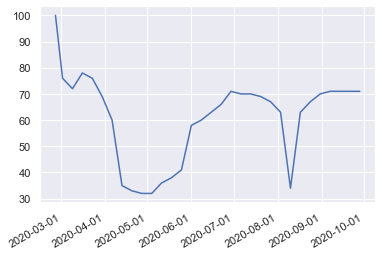

In [252]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(df_cal['date(year/month/day)'], df_cal["busy of terminal station(%)"])

##以下をカスタマイズする
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

plt.show()

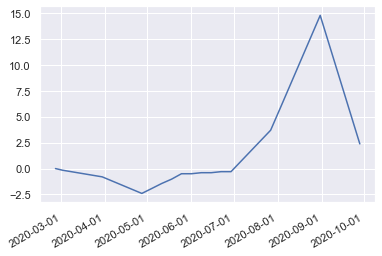

In [253]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(df_cal['date(year/month/day)'], df_cal["sales of side dish(error from 91.1billion)"])

##以下をカスタマイズする
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

plt.show()

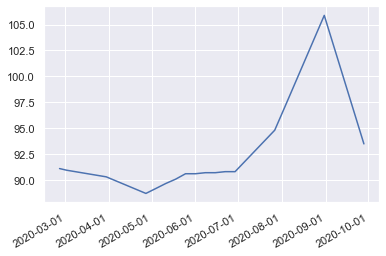

In [254]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(df_cal['date(year/month/day)'], df_cal["sales of side dish of month(billion)"])

##以下をカスタマイズする
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

plt.show()

In [255]:
data_col = ["sales of side dish of month(billion)"]

In [256]:
target_col = ["busy of terminal station(%)"]

In [257]:
concat_col = data_col+target_col

In [258]:
data = df_cal[data_col]

In [259]:
target = df_cal[target_col]

In [260]:
concat = df_cal[concat_col]

In [261]:
result = sm.OLS(target.astype(float),sm.add_constant(data.astype(float))).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     busy of terminal station(%)   R-squared:                       0.062
Model:                                     OLS   Adj. R-squared:                  0.031
Method:                          Least Squares   F-statistic:                     1.999
Date:                         Thu, 05 Nov 2020   Prob (F-statistic):              0.168
Time:                                 10:01:37   Log-Likelihood:                -134.24
No. Observations:                           32   AIC:                             272.5
Df Residuals:                               30   BIC:                             275.4
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  -20.8758     58.005     -0.360      0.721    -139.338      97.587
sales of side dish of month(billion)     0.8774      0.621      1.414      0.168      -0.390       2.145
==============================================================================
Omnibus:                        0.301   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.860   Jarque-Bera (JB):                0.121
Skew:                          -0.145   Prob(JB):                        0.941
Kurtosis:                       2.920   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

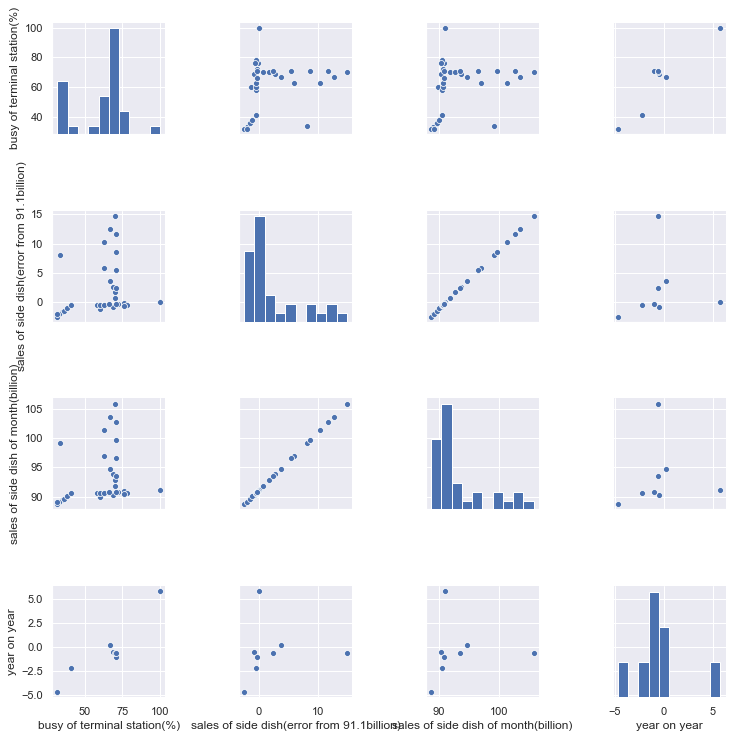

In [262]:
sns.pairplot(df_cal)

In [263]:
concat = concat.astype("float32")

In [264]:
null_table(concat)

,欠損数,%
sales of side dish of month(billion),0,0.0
busy of terminal station(%),0,0.0


In [265]:
load.show(concat)

dara shape==>
 (32, 2)
------------------------------
index ==>
 Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
           dtype='int64')
------------------------------
column ==>
 Index(['sales of side dish of month(billion)', 'busy of terminal station(%)'], dtype='object')
------------------------------
dtype==>
 sales of side dish of month(billion)    float32
busy of terminal station(%)             float32
dtype: object
------------------------------
   sales of side dish of month(billion)  busy of terminal station(%)
1                             91.099998                        100.0
2                             90.940002                         76.0
3                             90.779999                         72.0
4                             90.620003                         78.0
5                             90.459999                         76.0
----------------------

,sales of side dish of month(billion),busy of terminal station(%)
1,91.099998,100.0
2,90.940002,76.0
3,90.779999,72.0
4,90.620003,78.0
5,90.459999,76.0
6,90.300003,69.0
7,89.900002,60.0
8,89.500000,35.0
9,89.099998,33.0
10,88.699997,32.0


In [266]:
cr_matrix = concat.corr()

In [267]:
cr_matrix

,sales of side dish of month(billion),busy of terminal station(%)
sales of side dish of month(billion),1.000000,0.249943
busy of terminal station(%),0.249943,1.000000


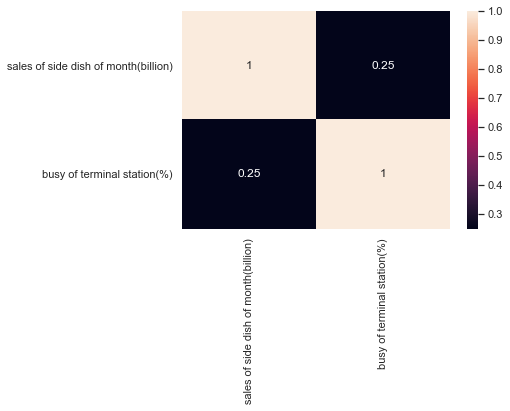

In [268]:
sns.heatmap(cr_matrix, annot=True)

In [269]:
df_cal = load.delete(df_cal)

colmuns
↓

1 : date(year/month/day)
2 : busy of terminal station(%)
3 : sales of side dish(error from 91.1billion)
4 : sales of side dish of month(billion)
5 : year on year
----------------------------------------------------------
What colmundo you want to kill ?:5
----------------------------------------------------------
year on year is deleted


In [270]:
df_time =  df_cal["date(year/month/day)"]
df_data = df_cal.iloc[:,1:]

In [271]:
df_time

1     2020-02-26 00:00:00
2     2020-03-02 00:00:00
3     2020-03-09 00:00:00
4     2020-03-16 00:00:00
5     2020-03-23 00:00:00
6     2020-03-30 00:00:00
7     2020-04-06 00:00:00
8     2020-04-13 00:00:00
9     2020-04-20 00:00:00
10    2020-04-27 00:00:00
11    2020-05-04 00:00:00
12    2020-05-11 00:00:00
13    2020-05-18 00:00:00
14    2020-05-25 00:00:00
15    2020-06-01 00:00:00
16    2020-06-08 00:00:00
17    2020-06-15 00:00:00
18    2020-06-22 00:00:00
19    2020-06-29 00:00:00
20    2020-07-06 00:00:00
21    2020-07-13 00:00:00
22    2020-07-20 00:00:00
23    2020-07-27 00:00:00
24    2020-08-03 00:00:00
25    2020-08-10 00:00:00
26    2020-08-17 00:00:00
27    2020-08-24 00:00:00
28    2020-08-31 00:00:00
29    2020-09-07 00:00:00
30    2020-09-14 00:00:00
31    2020-09-21 00:00:00
32    2020-09-28 00:00:00
Name: date(year/month/day), dtype: object

In [272]:
df_data=df_data.astype("float32")

In [273]:
df_data.dtypes

busy of terminal station(%)                   float32
sales of side dish(error from 91.1billion)    float32
sales of side dish of month(billion)          float32
dtype: object

In [274]:
X = data["sales of side dish of month(billion)"].astype("float32")
y = target["busy of terminal station(%)"].astype("float32")

In [275]:
y[0:3].mean()

82.666664

In [276]:
def make_dataset(x,y):

    data, target = [], []
    maxlen = 4

    for i in range(len(x)-maxlen):
        data.append(x[i:i + maxlen])
        target.append(y[i:i + maxlen].mean())

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target

In [277]:
g,h = make_dataset(X,y)

In [278]:
g

array([[[ 91.1  ],
        [ 90.94 ],
        [ 90.78 ],
        [ 90.62 ]],

       [[ 90.94 ],
        [ 90.78 ],
        [ 90.62 ],
        [ 90.46 ]],

       [[ 90.78 ],
        [ 90.62 ],
        [ 90.46 ],
        [ 90.3  ]],

       [[ 90.62 ],
        [ 90.46 ],
        [ 90.3  ],
        [ 89.9  ]],

       [[ 90.46 ],
        [ 90.3  ],
        [ 89.9  ],
        [ 89.5  ]],

       [[ 90.3  ],
        [ 89.9  ],
        [ 89.5  ],
        [ 89.1  ]],

       [[ 89.9  ],
        [ 89.5  ],
        [ 89.1  ],
        [ 88.7  ]],

       [[ 89.5  ],
        [ 89.1  ],
        [ 88.7  ],
        [ 89.175]],

       [[ 89.1  ],
        [ 88.7  ],
        [ 89.175],
        [ 89.656]],

       [[ 88.7  ],
        [ 89.175],
        [ 89.656],
        [ 90.075]],

       [[ 89.175],
        [ 89.656],
        [ 90.075],
        [ 90.6  ]],

       [[ 89.656],
        [ 90.075],
        [ 90.6  ],
        [ 90.6  ]],

       [[ 90.075],
        [ 90.6  ],
        [ 90.6  ],
       

In [279]:
h

array([[81.5 ],
       [75.5 ],
       [73.75],
       [70.75],
       [60.  ],
       [49.25],
       [40.  ],
       [33.  ],
       [33.25],
       [34.5 ],
       [36.75],
       [43.25],
       [49.25],
       [55.5 ],
       [61.75],
       [65.  ],
       [67.5 ],
       [69.25],
       [70.  ],
       [69.  ],
       [67.25],
       [58.25],
       [56.75],
       [56.75],
       [58.5 ],
       [67.75],
       [69.75],
       [70.75]], dtype=float32)

In [280]:
h.shape

(28, 1)

In [281]:
X_train, X_test, y_train, y_test = split(g,h)

シャッフルする:1 シャッフルしない:21
testサイズを選んでください0.2


In [288]:
g.shape[1] 

4

In [282]:
# 1つの学習データのStep数(今回は25)
length_of_sequence = g.shape[1] 
in_out_neurons = 1
n_hidden = 128

model = Sequential()
model.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer="rmsprop")
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_9 (Activation)    (None, 1)                 0         
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [283]:
es = EarlyStopping(monitor="val_loss",mode="auto",patience=5)

In [284]:
model.fit(X_train,y_train,
         epochs = 1000,
         validation_split=0.1,
         callbacks=[es])

Epoch 1/1000
1/1 [==============================] - 0s 289ms/step - loss: 3822.4021 - val_loss: 3362.0410
Epoch 2/1000
1/1 [==============================] - 0s 27ms/step - loss: 3774.0371 - val_loss: 3327.4561
Epoch 3/1000
1/1 [==============================] - 0s 28ms/step - loss: 3737.5242 - val_loss: 3286.9512
Epoch 4/1000
1/1 [==============================] - 0s 31ms/step - loss: 3695.1990 - val_loss: 3220.0261
Epoch 5/1000
1/1 [==============================] - 0s 29ms/step - loss: 3623.5645 - val_loss: 3186.5251
Epoch 6/1000
1/1 [==============================] - 0s 28ms/step - loss: 3587.9412 - val_loss: 3160.5964
Epoch 7/1000
1/1 [==============================] - 0s 27ms/step - loss: 3560.5945 - val_loss: 3134.0059
Epoch 8/1000
1/1 [==============================] - 0s 34ms/step - loss: 3532.6069 - val_loss: 3105.9792
Epoch 9/1000
1/1 [==============================] - 0s 31ms/step - loss: 3503.1501 - val_loss: 3075.8108
Epoch 10/1000
1/1 [==============================] - 0

1/1 [==============================] - 0s 26ms/step - loss: 1659.9144 - val_loss: 1392.3248
Epoch 79/1000
1/1 [==============================] - 0s 26ms/step - loss: 1651.1575 - val_loss: 1384.4237
Epoch 80/1000
1/1 [==============================] - 0s 26ms/step - loss: 1642.4431 - val_loss: 1376.5557
Epoch 81/1000
1/1 [==============================] - 0s 33ms/step - loss: 1633.7640 - val_loss: 1368.7128
Epoch 82/1000
1/1 [==============================] - 0s 25ms/step - loss: 1625.1094 - val_loss: 1360.8646
Epoch 83/1000
1/1 [==============================] - 0s 25ms/step - loss: 1616.4453 - val_loss: 1352.9604
Epoch 84/1000
1/1 [==============================] - 0s 26ms/step - loss: 1607.7145 - val_loss: 1344.9833
Epoch 85/1000
1/1 [==============================] - 0s 26ms/step - loss: 1598.9027 - val_loss: 1336.9659
Epoch 86/1000
1/1 [==============================] - 0s 26ms/step - loss: 1590.0459 - val_loss: 1328.9523
Epoch 87/1000
1/1 [==============================] - 0s 25ms

1/1 [==============================] - 0s 26ms/step - loss: 1056.5345 - val_loss: 852.8474
Epoch 156/1000
1/1 [==============================] - 0s 27ms/step - loss: 1048.9758 - val_loss: 846.2735
Epoch 157/1000
1/1 [==============================] - 0s 27ms/step - loss: 1041.5161 - val_loss: 839.8338
Epoch 158/1000
1/1 [==============================] - 0s 28ms/step - loss: 1034.2094 - val_loss: 833.5309
Epoch 159/1000
1/1 [==============================] - 0s 36ms/step - loss: 1027.0582 - val_loss: 827.3530
Epoch 160/1000
1/1 [==============================] - 0s 27ms/step - loss: 1020.0437 - val_loss: 821.2751
Epoch 161/1000
1/1 [==============================] - 0s 28ms/step - loss: 1013.1394 - val_loss: 815.2810
Epoch 162/1000
1/1 [==============================] - 0s 26ms/step - loss: 1006.3240 - val_loss: 809.3544
Epoch 163/1000
1/1 [==============================] - 0s 26ms/step - loss: 999.5816 - val_loss: 803.4858
Epoch 164/1000
1/1 [==============================] - 0s 27ms/

1/1 [==============================] - 0s 27ms/step - loss: 601.7151 - val_loss: 463.6767
Epoch 234/1000
1/1 [==============================] - 0s 26ms/step - loss: 596.9608 - val_loss: 459.7461
Epoch 235/1000
1/1 [==============================] - 0s 32ms/step - loss: 592.2332 - val_loss: 455.8416
Epoch 236/1000
1/1 [==============================] - 0s 35ms/step - loss: 587.5323 - val_loss: 451.9637
Epoch 237/1000
1/1 [==============================] - 0s 28ms/step - loss: 582.8581 - val_loss: 448.1119
Epoch 238/1000
1/1 [==============================] - 0s 29ms/step - loss: 578.2101 - val_loss: 444.2861
Epoch 239/1000
1/1 [==============================] - 0s 28ms/step - loss: 573.5886 - val_loss: 440.4867
Epoch 240/1000
1/1 [==============================] - 0s 29ms/step - loss: 568.9935 - val_loss: 436.7137
Epoch 241/1000
1/1 [==============================] - 0s 28ms/step - loss: 564.4250 - val_loss: 432.9666
Epoch 242/1000
1/1 [==============================] - 0s 28ms/step - l

1/1 [==============================] - 0s 28ms/step - loss: 307.1935 - val_loss: 232.9389
Epoch 312/1000
1/1 [==============================] - 0s 28ms/step - loss: 304.4371 - val_loss: 230.9871
Epoch 313/1000
1/1 [==============================] - 0s 26ms/step - loss: 301.7067 - val_loss: 229.0599
Epoch 314/1000
1/1 [==============================] - 0s 36ms/step - loss: 299.0012 - val_loss: 227.1561
Epoch 315/1000
1/1 [==============================] - 0s 28ms/step - loss: 296.3188 - val_loss: 225.2714
Epoch 316/1000
1/1 [==============================] - 0s 27ms/step - loss: 293.6532 - val_loss: 223.3970
Epoch 317/1000
1/1 [==============================] - 0s 26ms/step - loss: 290.9918 - val_loss: 221.5247
Epoch 318/1000
1/1 [==============================] - 0s 26ms/step - loss: 288.3234 - val_loss: 219.6549
Epoch 319/1000
1/1 [==============================] - 0s 29ms/step - loss: 285.6500 - val_loss: 217.8003
Epoch 320/1000
1/1 [==============================] - 0s 29ms/step - l

1/1 [==============================] - 0s 26ms/step - loss: 163.9289 - val_loss: 152.1151
Epoch 390/1000
1/1 [==============================] - 0s 27ms/step - loss: 163.1070 - val_loss: 152.0206
Epoch 391/1000
1/1 [==============================] - 0s 30ms/step - loss: 162.3081 - val_loss: 151.9458
Epoch 392/1000
1/1 [==============================] - 0s 35ms/step - loss: 161.5323 - val_loss: 151.8906
Epoch 393/1000
1/1 [==============================] - 0s 27ms/step - loss: 160.7793 - val_loss: 151.8544
Epoch 394/1000
1/1 [==============================] - 0s 28ms/step - loss: 160.0489 - val_loss: 151.8372
Epoch 395/1000
1/1 [==============================] - 0s 28ms/step - loss: 159.3411 - val_loss: 151.8387
Epoch 396/1000
1/1 [==============================] - 0s 27ms/step - loss: 158.6555 - val_loss: 151.8584
Epoch 397/1000
1/1 [==============================] - 0s 27ms/step - loss: 157.9920 - val_loss: 151.8963
Epoch 398/1000
1/1 [==============================] - 0s 27ms/step - l

In [285]:
predicted = model.predict(X_test)

In [286]:
predicted

array([[57.34987 ],
       [57.35097 ],
       [57.349762],
       [57.351044],
       [57.350063],
       [57.35006 ]], dtype=float32)

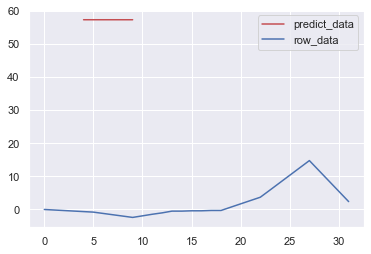

In [287]:
plt.figure()
plt.plot(range(4,len(predicted)+4),predicted, color="r", label="predict_data")
plt.plot(range(0, len(df_cal["sales of side dish(error from 91.1billion)"])),df_cal["sales of side dish(error from 91.1billion)"], color="b", label="row_data")
plt.legend()
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(df_cal['date(year/month/day)'], df_cal["sales of side dish(error from 91.1billion)"])
ax.plot(df_cal['date(year/month/day)'],)

##以下をカスタマイズする
daysFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(daysFmt)
fig.autofmt_xdate()

plt.show()